# Analysis of Top Ranked Colleges in the United States

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv('C:\\Users\\Woyte\\OneDrive\\Data\\Forbescolleges2019.csv')
df.head(3)

,Rank,Name,City,State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Website
0,1.0,Harvard University,Cambridge,MA,Private,13844.0,31120.0,14327.0,49870.0,69600.0,146800.0,5.0,1460.0,1590.0,32.0,35.0,www.harvard.edu
1,2.0,Stanford University,Stanford,CA,Private,8402.0,17534.0,13261.0,50134.0,69109.0,145200.0,5.0,1390.0,1540.0,32.0,35.0,www.stanford.edu
2,3.0,Yale University,New Haven,CT,Private,6483.0,12974.0,18627.0,50897.0,71290.0,138300.0,7.0,1460.0,1580.0,32.0,35.0,www.yale.edu


### Variable Creation

##### Test Scores

Looking at the columns from the dataframe, I noticed that there was a lower and upper value for both the student population's SAT and ACT scores, but not an average, so I wanted to create an average variable myself. Note: This average is not the average score of the student population, but the average score between the highest and lowest scorers amonst the population.

##### Public/Private 

The variable is currently contained as a string, which isn't very useful for data analysis, so I decided to turn it into a binary variable where '1' were all public schools, and '0' were all private.

##### Undergraduate Percentage

The percentage of the student population enrolled in an undergraduate program

##### Test Difference

The difference between the highest and lowest test scores

##### Post-UG Population

The student population enrolled beyond an undergraduate education.

##### Post-UG Percentage

Percentage of the student population enrolled after obtaining a Bachelor's degree.

In [4]:
df['SAT Average']=df['SAT Lower']/2+df['SAT Upper']/2
df['ACT Average']=df['ACT Lower']/2+df['ACT Upper']/2

df.head(3)

,Rank,Name,City,State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Website,SAT Average,ACT Average
0,1.0,Harvard University,Cambridge,MA,Private,13844.0,31120.0,14327.0,49870.0,69600.0,146800.0,5.0,1460.0,1590.0,32.0,35.0,www.harvard.edu,1525.0,33.5
1,2.0,Stanford University,Stanford,CA,Private,8402.0,17534.0,13261.0,50134.0,69109.0,145200.0,5.0,1390.0,1540.0,32.0,35.0,www.stanford.edu,1465.0,33.5
2,3.0,Yale University,New Haven,CT,Private,6483.0,12974.0,18627.0,50897.0,71290.0,138300.0,7.0,1460.0,1580.0,32.0,35.0,www.yale.edu,1520.0,33.5


In [5]:
dummy=pd.get_dummies(df['Public/Private'], drop_first=True)
df=pd.concat([df, dummy], axis=1)
df=df.drop(['Public/Private', 'Website'], axis=1)
df.head(3)

,Rank,Name,City,State,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,SAT Average,ACT Average,Public
0,1.0,Harvard University,Cambridge,MA,13844.0,31120.0,14327.0,49870.0,69600.0,146800.0,5.0,1460.0,1590.0,32.0,35.0,1525.0,33.5,0
1,2.0,Stanford University,Stanford,CA,8402.0,17534.0,13261.0,50134.0,69109.0,145200.0,5.0,1390.0,1540.0,32.0,35.0,1465.0,33.5,0
2,3.0,Yale University,New Haven,CT,6483.0,12974.0,18627.0,50897.0,71290.0,138300.0,7.0,1460.0,1580.0,32.0,35.0,1520.0,33.5,0


In [6]:
df['Undergraduate Percentage'] = df['Undergraduate Population']/ df['Student Population']
df['ACT Difference'] = df['ACT Average']-20.6
df['SAT Difference'] = df['SAT Average']-1051
df['Post-UG Population'] = df['Student Population'] - df['Undergraduate Population']
df['Post-UG Percentage'] = df['Post-UG Population'] / df['Student Population']
df.head(3)

,Rank,Name,City,State,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,...,ACT Lower,ACT Upper,SAT Average,ACT Average,Public,Undergraduate Percentage,ACT Difference,SAT Difference,Post-UG Population,Post-UG Percentage
0,1.0,Harvard University,Cambridge,MA,13844.0,31120.0,14327.0,49870.0,69600.0,146800.0,...,32.0,35.0,1525.0,33.5,0,0.444859,12.9,474.0,17276.0,0.555141
1,2.0,Stanford University,Stanford,CA,8402.0,17534.0,13261.0,50134.0,69109.0,145200.0,...,32.0,35.0,1465.0,33.5,0,0.479183,12.9,414.0,9132.0,0.520817
2,3.0,Yale University,New Haven,CT,6483.0,12974.0,18627.0,50897.0,71290.0,138300.0,...,32.0,35.0,1520.0,33.5,0,0.499692,12.9,469.0,6491.0,0.500308


### Gathering Summary Statistics on Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rank                      650 non-null    float64
 1   Name                      650 non-null    object 
 2   City                      647 non-null    object 
 3   State                     650 non-null    object 
 4   Undergraduate Population  650 non-null    float64
 5   Student Population        650 non-null    float64
 6   Net Price                 648 non-null    float64
 7   Average Grant Aid         646 non-null    float64
 8   Total Annual Cost         650 non-null    float64
 9   Alumni Salary             635 non-null    float64
 10  Acceptance Rate           648 non-null    float64
 11  SAT Lower                 551 non-null    float64
 12  SAT Upper                 551 non-null    float64
 13  ACT Lower                 553 non-null    float64
 14  ACT Upper 

As the table shows, there are null values in my data. For example, about 15% of the SAT variables are null values. Null values can be troublesome for machine learning, so I shouvld do something about them. The two simplest ways are to remove any record containing a null value, or estimating the null values. By deleting the values, I'd be effectively cutting down my available data by around 1/5th, meaning the data's predictive capability would lessen. On the other hand, estimating values in place of the nulls might not be accurate, and so can also harm the predictive capabilities of the model based on how off they are. 

Later on, I will be trying out both methods to try and maximize my models' predictive capabilities.

In [8]:
df.describe()

,Rank,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,SAT Average,ACT Average,Public,Undergraduate Percentage,ACT Difference,SAT Difference,Post-UG Population,Post-UG Percentage
count,650.00000,650.000000,650.000000,648.000000,646.000000,650.000000,635.000000,648.000000,551.000000,551.000000,553.000000,553.000000,551.000000,553.000000,650.000000,650.000000,553.000000,551.000000,650.000000,650.000000
mean,325.50000,10002.692308,12022.290769,22336.947531,20031.208978,50330.175385,98851.968504,61.597222,1110.145191,1308.078040,23.278481,28.441230,1209.111615,25.859855,0.384615,0.851454,5.259855,158.111615,2019.598462,0.148546
std,187.78312,11162.172430,13175.091581,8269.912032,11175.869976,13223.055038,14335.249458,22.024781,127.744079,113.553237,3.729318,3.058115,119.091660,3.352316,0.486879,0.143043,3.352316,119.091660,3266.257945,0.143043
min,1.00000,185.000000,386.000000,0.000000,2975.000000,0.000000,70700.000000,5.000000,820.000000,1060.000000,15.000000,20.000000,964.000000,17.500000,0.000000,0.232771,-3.100000,-87.000000,1.000000,0.000072
25%,163.25000,2020.250000,2240.750000,16410.000000,9288.250000,39917.000000,88600.000000,48.000000,1020.000000,1230.000000,21.000000,26.000000,1130.000000,23.500000,0.000000,0.785172,2.900000,79.000000,140.000000,0.042070
50%,325.50000,4503.000000,6269.000000,21989.000000,19605.000000,50265.000000,96400.000000,67.000000,1080.000000,1290.000000,22.000000,28.000000,1180.000000,25.000000,0.000000,0.901800,4.400000,129.000000,669.000000,0.098200
75%,487.75000,15657.000000,17788.000000,27580.500000,27474.500000,60771.750000,105600.000000,78.000000,1180.000000,1380.000000,25.000000,31.000000,1272.500000,28.000000,1.000000,0.957930,7.400000,221.500000,2615.750000,0.214828
max,650.00000,65100.000000,75044.000000,47270.000000,50897.000000,75735.000000,158200.000000,100.000000,1530.000000,1590.000000,34.000000,35.000000,1560.000000,34.500000,1.000000,0.999928,13.900000,509.000000,25105.000000,0.767229


The first thing that jumps out to me is how varied the data is. For instance the Public column is a binary variable using zero and one, while the Student Population column has a range between 386 and 75044. Because of this, any machine learning models will place more weight to the variables with the larger values. I should standardize and scale the data so that everything will be weighted equally in the machine learning models.

<AxesSubplot:>

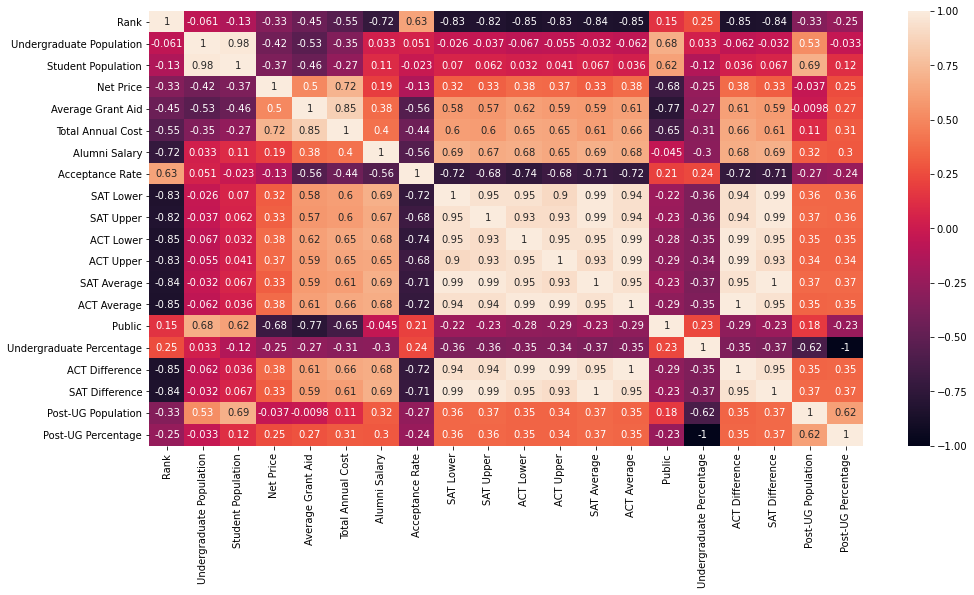

In [9]:
df_corr = df.corr()
plt.figure(figsize=(16,8))
sns.heatmap(df_corr, annot=True)

In [10]:
df_corr["Rank"].sort_values(ascending=False)

Rank                        1.000000
Acceptance Rate             0.628110
Undergraduate Percentage    0.250042
Public                      0.147599
Undergraduate Population   -0.060859
Student Population         -0.133249
Post-UG Percentage         -0.250042
Net Price                  -0.329445
Post-UG Population         -0.329503
Average Grant Aid          -0.445638
Total Annual Cost          -0.552349
Alumni Salary              -0.721772
SAT Upper                  -0.822319
ACT Upper                  -0.830561
SAT Lower                  -0.834263
SAT Average                -0.839476
SAT Difference             -0.839476
ACT Lower                  -0.849047
ACT Difference             -0.851101
ACT Average                -0.851101
Name: Rank, dtype: float64

These correlations are what one would expect at first glance. Public schools with a more inclusive acceptance rate and a large portion of their population being undergraduate tend to be lowly ranked, while the higher test scores and alumni salary tend to go to higher ranked colleges.

<AxesSubplot:xlabel='SAT Average', ylabel='Count'>

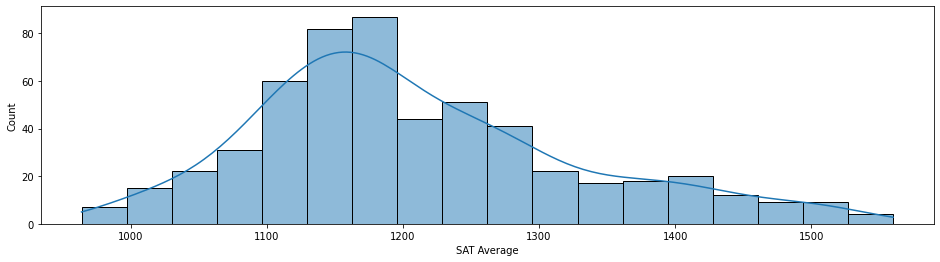

In [11]:
plt.figure(figsize=(16,4))
sns.histplot(df['SAT Average'], kde=True)
#average is 1051

<AxesSubplot:xlabel='ACT Average', ylabel='Count'>

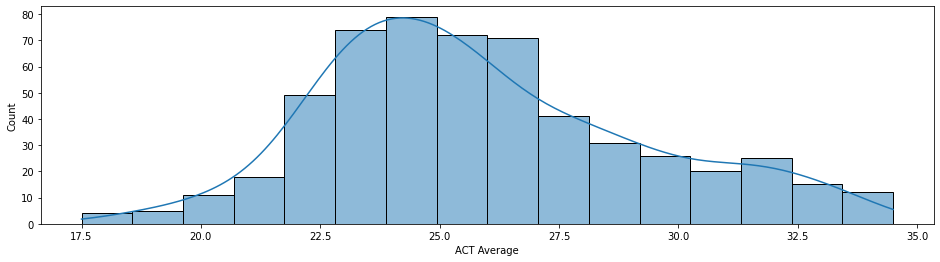

In [12]:
plt.figure(figsize=(16,4))
sns.histplot(df['ACT Average'], kde=True)
#average is 20.6

As both graphs show, the average test score -  which is the difference between the highest scoring studen and lowest scoring student - are usually higher than the average test scores of the population. This is a bit of comparing apples to oranges due to the different ways average scores are calculated here, but this does show that the colleges in this dataset typically go after higher scoring students.  

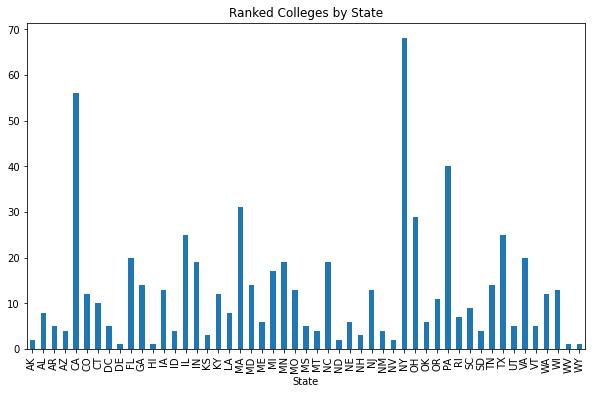

In [13]:
state_rank=df['Rank'].groupby([df['State']]).count()
state_rank.plot(kind='bar', title = 'Ranked Colleges by State', figsize = (10,6));


In [14]:
census = pd.read_excel('C:\\Users\\Woyte\\OneDrive\\Data\\nst-est2019-01.xlsx', sheet_name=1, index_col=0)
census.head(3)

,Population
State,
AL,4903185
AK,731545
AZ,7278717


In [15]:
census_sorted= census.sort_values('Population')
state_rank_sorted = state_rank.sort_values()

<AxesSubplot:title={'center':'Population by State'}, xlabel='State '>

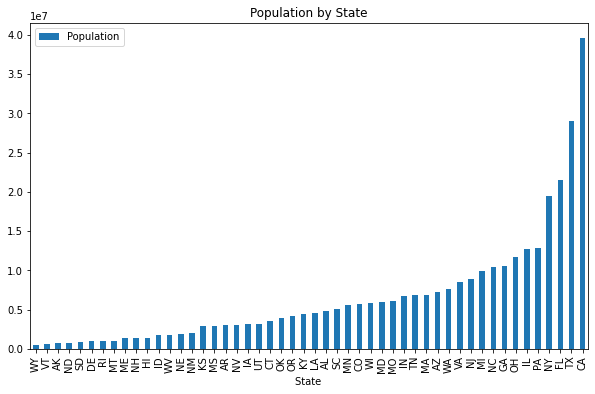

In [16]:
census_sorted.plot(kind='bar', title = 'Population by State', figsize = (10,6))


<AxesSubplot:title={'center':'Ranked Colleges by State'}, xlabel='State'>

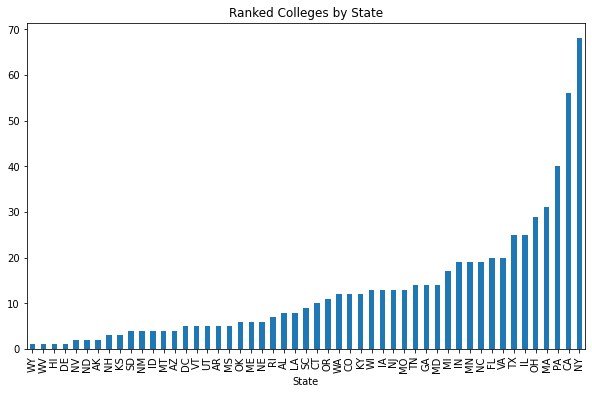

In [17]:
state_rank_sorted.plot(kind='bar', title = 'Ranked Colleges by State', figsize = (10,6))

As to be expected, the amount of ranked colleges in a state almost exactly follows the population distribution of the states. One notable exception to this is Texas, which is the second highest state by population, but only the seventh highest in terms of ranked universities. In fact, it should have around twice as many ranked universities as it does currently.

# Building a Model to Predict College Rankings

In [18]:
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

### Step 1
Step one of my machine learning process is preparing the data to be more useful to the algorithms. In this instance, that means removing all the columns made up of strings, as well as separating the predicted variable from the explainer variables. Furthermore, I'll be dividing the data between a train set and a test set. As the names imply, a training set is what the machine learning models are initially built off of, while the test set is used to test the model's accuracy. 

One does not want to use a training set for both training and testing as one could accidentally overfitt the model to the data, meaning, while the model is useful for the specific data used, if any more data is brought in, the model will become much more inaccurate than a model tested with a separate test set of data.

In [19]:
df=df.drop(['Name', 'City', 'State'], axis = 1)
df_goal=df['Rank'].copy()
df2=df.drop('Rank', axis=1)
df_train, df_test, goal_train, goal_test = train_test_split(df2, df_goal, test_size=.33, random_state=42)

In [20]:
df_train.head(3)

,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,SAT Average,ACT Average,Public,Undergraduate Percentage,ACT Difference,SAT Difference,Post-UG Population,Post-UG Percentage
522,22386.0,24375.0,15368.0,7270.0,43444.0,89900.0,86.0,980.0,1200.0,18.0,25.0,1090.0,21.5,1,0.918400,0.9,39.0,1989.0,0.081600
178,2367.0,2535.0,31014.0,25282.0,65330.0,101900.0,48.0,1140.0,1340.0,25.0,30.0,1240.0,27.5,0,0.933728,6.9,189.0,168.0,0.066272
260,29777.0,30896.0,20493.0,8263.0,44706.0,104800.0,79.0,1070.0,1300.0,22.0,28.0,1185.0,25.0,1,0.963782,4.4,134.0,1119.0,0.036218


To prepare the data more, I will also be standardizing the data so that the whole set will have similar deviations. I will also be implementing an imputer to fill in the nulls values in the data with an estimate of what they could be based on the column's median value. I am doing this to save as much of the data as possible, but later I will make a regressor model without the imputer to see how it compares.

In [21]:
standardscaler = StandardScaler()
imputer = SimpleImputer(strategy='median')
pipe = Pipeline([('std', standardscaler), ('imputer', imputer)])
pipe.fit(df_train, goal_train)
df_train2 = pipe.transform(df_train)
df_test2 = pipe.transform(df_test)

### First Model: K-Nearest Neighbors

The first model we will run is a KNN model. This model is one of the simplest machine learning models to run, meaning it also takes much less resources on the system than a more complex model. Typically one should use the simplest model first in order to save on resources. In the case of K-Nearest Neighbors, it takes the given records and compares them to the records with the variables closest to them. So if I wanted to know what rank a public university with an acceptance rate of 70% and a net price of $18,000, the model will look at the closest public universities with a similar acceptance rate and net price. 

Every model will be judged by two criteria: the RMSE, or root mean squared error, and the cross validation accuracy score. RMSE refers to the absolute value of the error in a predicted value. So if the model predicts a college will be ranked 4th, but in reality it was ranked 2nd, then the RMSE of the prediction would be two. Cross validation is typically used when the data is rather limites or as a way to protect against overfitting the data. Basically the training set will be split up many more times and iterations of the machine learning algorithm will be fitted and tested against the partitions. You can then average out the accuracy of the partitions, and get an overall accuracy score for the predictions.

In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

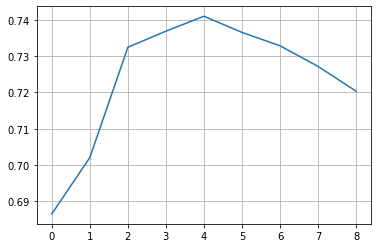

In [23]:
n_neighbors =list(range(1, 10))
accuracy = []
for neighbor in n_neighbors:
    clf = KNeighborsRegressor(n_neighbors = neighbor)
    clf.fit(df_train2, goal_train)
    score = clf.score(df_test2, goal_test)
    accuracy.append(score)
plt.grid(True)
plt.plot(accuracy)

Many machine learning models allow for parameter tuning to get the best predictive results. In the case of K-Nearest Neighbors, one can choose the amount of neighbors closest to the college being predicted. One might think that more is always better, but adding more neighbors takes more system resources and can hurt the predictive capabilities of the model. In the case of the above, we can see that the model is most accurate when limited to four nearest neighbors. 

In [24]:
knn = KNeighborsRegressor(n_neighbors = 4)
knn.fit(df_train2, goal_train)
knn_predict = knn.predict(df_test2)
knn_mse = np.power(goal_test - knn_predict, 2).mean()

In [25]:
knn_mse

9319.088662790698

In [26]:
mean_squared_error(goal_test, knn_predict)

9319.088662790698

In [27]:
knn_rmse= knn_mse ** .5
knn_rmse

96.53542698300298

The accuracy score given while doing parameter tuning was not a robust score. It was good for determining the best number of parameters to use, but it is likely off by at least a little bit due to only running the model once on a select subset of the data. Therefore I'll be using cross validation to get a more accurate score.

In [28]:
knn_scores = cross_val_score(knn, df_test2, goal_test, cv=10)
knn_scores


array([0.794885  , 0.71838554, 0.8986766 , 0.81744243, 0.7089424 ,
       0.68471291, 0.59426826, 0.76292426, 0.63861639, 0.77691769])

In [29]:
knn_scores.mean()

0.7395771478536421

With an RMSE of 96.5 and an accuracy score of 73.9%, this model isn't a great predictor of a college's rank. It's accuracy score is respectable, but the RMSE of 96.5 means that it won't predict much. There is a huge difference in a college in the top 10 and a college in the top 100, yet the model is likely to miss the correct ranking of a college by about the same amount. We will be moving on to other models to try and get a effective model.

### Second Model: Linear Regression

The second model will be a linear regression. Linear regressions are also a simpler type of regression, but, depending on the variables involved, they are generally more complex than KNN. I'll be building a linear regression model using two methods. This is because, while Sci-Kit Learn's regressions allow a user to do many things, they don't allow you to analyse individual variables, something offered by Statemodels. So I'll be using both.

In [30]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
reg = LinearRegression()
reg.fit(df_train2, goal_train)
reg_predict = reg.predict(df_test2)

In [31]:
reg_mse = np.power(goal_test - reg_predict, 2).mean()
reg_mse

10302.234400465317

In [32]:
mean_squared_error(goal_test, reg_predict)

10302.234400465317

In [33]:
reg_rmse= reg_mse **.5
reg_rmse

101.49992315497248

In [34]:
reg_scores = cross_val_score(reg, df_test2, goal_test, cv=10)
reg_scores


array([0.74019212, 0.64185176, 0.80766255, 0.77701872, 0.73228213,
       0.65909261, 0.6692306 , 0.72233914, 0.73605185, 0.74614342])

In [35]:
reg_scores.mean()


0.7231864884213678

In [36]:
x=sm.add_constant(df_train2)
model = sm.OLS(goal_train, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.41
Date:                Mon, 13 Sep 2021   Prob (F-statistic):          7.74e-118
Time:                        20:49:51   Log-Likelihood:                -2588.4
No. Observations:                 435   AIC:                             5207.
Df Residuals:                     420   BIC:                             5268.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        328.7755      5.059     64.991      0.000     318.832     338.719
x1           -20.4626      5.775     -3.544      0.000     -31.813      -9.112
x2           -15.3993      3.476     -4.430      0.000     -22.232      -8.566
x3           -22.9348      9.319     -2.461      0.014     -41.252      -4.618
x4            26.9552     14.075      1.915      0.056      -0.710      54.621
x5           -47.8183     12.510     -3.822      0.000     -72.408     -23.228
x6           -42.5044      6.724     -6.322      0.000     -55.720     -29.288
x7            29.3555      6.753      4.347      0.000      16.083      42.629
x8            38.5810    169.204      0.228      0.820    -294.010     371.172
x9            26.0582    149.456      0.174      0.862    -267.716     319.832
x10          -15.5589     18.712     -0.831      0.406     -52.340      21.222
x11          -19.7339     19.315     -1.022      0.308     -57.699      18.231
x12          -45.1689    157.650     -0.287      0.775    -355.050     264.712
x13          -17.6337      4.215     -4.183      0.000     -25.919      -9.348
x14            1.7050     11.227      0.152      0.879     -20.363      23.772
x15           -5.5583      3.489     -1.593      0.112     -12.416       1.300
x16          -17.6337      4.215     -4.183      0.000     -25.919      -9.348
x17          -45.1689    157.650     -0.287      0.775    -355.050     264.712
x18            7.9363      9.090      0.873      0.383      -9.931      25.803
x19            5.5583      3.489      1.593      0.112      -1.300      12.416
==============================================================================
Omnibus:                        1.895   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.388   Jarque-Bera (JB):                1.718
Skew:                          -0.081   Prob(JB):                        0.424
Kurtosis:                       3.261   Cond. No.                     1.61e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.52e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Third Model: Random Forest Regressor

This model is by far the most complex of the models used. Similar to how cross validation treats training data, random forest regressors takes a decision tree and runs multiple iterations against the data, averaging out the iterations. It's a great overall model and tends to work better on more complex datasets.

In [37]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(random_state=42)
forest.fit(df_train2, goal_train)
forest_predict = forest.predict(df_test2)
forest_mse = np.power(goal_test - forest_predict, 2).mean()
forest_mse

6960.33954604651

In [38]:
forest_rmse= forest_mse **.5
forest_rmse

83.42864943199375

In [39]:
forest_scores = cross_val_score(forest, df_test2, goal_test, cv=10)
forest_scores

array([0.86632698, 0.75866635, 0.83249986, 0.8694084 , 0.69275768,
       0.75625868, 0.74860723, 0.81315518, 0.83219168, 0.8311133 ])

In [40]:
forest_scores.mean()

0.8000985332657431

With an RMSE of 83.4, over ten digits under the RMSE of the KNN model, and an accuracy of 80% - 6% higher than the accuracy of the KNN model, this model performs better against the data to a sizable degree compared to the other models.

That being said, a standard error in predicting a rank being 83.4 digits is not a good predictor. The most likely reason for this being that the parameter variables given are not themselves a strong enough predictor for a college rank, suggesting that more information is used to determine a college's ranking than just the ones given. 

# No Impute

The goal of the following analysis is to test the best predictive model from our previous selections and test it against a copy of the dataset where I removed all the records with null values instead of using estimated values. 

For this test I will just be using the random forest regressor. While normally it'd be worth testing more models, since the predicted and predictor variables aren't changing outside of the null values, it's more efficient to just bring the best predictive model over.

In [41]:
df3=df.dropna()
df3_goal=df3['Rank'].copy()
df3=df3.drop(['Rank'], axis=1)


In [42]:
df_train3, df_test3, goal_train3, goal_test3 = train_test_split(df3, df3_goal, test_size=.33, random_state=42)
pipe2 = Pipeline([('std', standardscaler)])
pipe2.fit(df_train3, goal_train3)
df_train4 = pipe.transform(df_train3)
df_test4 = pipe.transform(df_test3)

In [43]:
forest2=RandomForestRegressor(random_state=42)
forest2.fit(df_train4, goal_train3)
forest2_predict = forest2.predict(df_test4)
forest2_mse = np.power(goal_test3 - forest2_predict, 2).mean()
forest2_mse

6346.378575722541

In [44]:
forest2_rmse= forest2_mse **.5
forest2_rmse

79.66416117503869

In [45]:
forest_scores2 = cross_val_score(forest2, df_test4, goal_test3, cv=10)
forest_scores2

array([0.78817466, 0.77596259, 0.79245394, 0.83675126, 0.83025825,
       0.84631427, 0.60307723, 0.6617484 , 0.814059  , 0.80734403])

In [46]:
forest_scores2.mean()

0.7756143634832479

With an RMSE of 79.66 - around four digits off of the RMSE with imputation - and a cross validation accuracy score of 77.56% - around 2.5% below the accuracy score with imputation - it depends on what metric you focus on to determine which method is better. Dropping the nulls proved to make the model slightly more predictive, yet slightly less accurate. Due to the change in RMSE being larger, I'm going to rely on it for determining the better model. After all, The difference in accuracy scores might not be statistically significant. Therefore I'll forgo imputations in future models.

## Predicting Alumni Salary

Due to a lack of subjectivity, alumni salary is a potentially better variable for determining the greatness of a college while also being easier to predict. These algorithms will be designed with the nulls removed instead of estimated. 

In [47]:
df_corr['Alumni Salary'].sort_values(ascending=False)

Alumni Salary               1.000000
SAT Lower                   0.692809
SAT Average                 0.688489
SAT Difference              0.688489
ACT Lower                   0.684012
ACT Difference              0.676508
ACT Average                 0.676508
SAT Upper                   0.665051
ACT Upper                   0.649847
Total Annual Cost           0.398787
Average Grant Aid           0.377548
Post-UG Population          0.320138
Post-UG Percentage          0.297272
Net Price                   0.191580
Student Population          0.107621
Undergraduate Population    0.032952
Public                     -0.045116
Undergraduate Percentage   -0.297272
Acceptance Rate            -0.556903
Rank                       -0.721772
Name: Alumni Salary, dtype: float64

As we can see, the variables most correlated to Almunmni Salary are the same variables most correlated to a college's rank. 

In [48]:
df3=df.dropna()
df_goal4=df3['Net Price'].copy()
df4=df3.drop('Net Price', axis=1)
df_train5, df_test5, goal_train3, goal_test3 = train_test_split(df4, df_goal4, test_size=.33, random_state=42)
df_train5.head(3)

,Rank,Undergraduate Population,Student Population,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,SAT Average,ACT Average,Public,Undergraduate Percentage,ACT Difference,SAT Difference,Post-UG Population,Post-UG Percentage
601,602.0,2814.0,3343.0,6195.0,35144.0,81500.0,86.0,990.0,1200.0,20.0,25.0,1095.0,22.5,1,0.841759,1.9,44.0,529.0,0.158241
458,459.0,1043.0,1231.0,22690.0,44408.0,77900.0,91.0,1060.0,1320.0,22.0,29.0,1190.0,25.5,0,0.847279,4.9,139.0,188.0,0.152721
3,4.0,4680.0,11466.0,43248.0,67430.0,155200.0,7.0,1490.0,1570.0,33.0,35.0,1530.0,34.0,0,0.408163,13.4,479.0,6786.0,0.591837


In [49]:
pipe2.fit(df_train5, goal_train3)
df_train6 = pipe2.transform(df_train5)
df_test6 = pipe2.transform(df_test5)



### First Model: Random Forest Regressor

In [50]:
forest3=RandomForestRegressor(random_state=42)
forest3.fit(df_train6, goal_train3)
forest3_predict = forest3.predict(df_test6)
forest3_mse = np.power(goal_test3 - forest3_predict, 2).mean()
forest3_mse

18774601.68435087

In [51]:
forest3_rmse= forest3_mse ** .5
forest3_rmse

4332.966845517153

In [52]:
forest_scores3 = cross_val_score(forest3, df_test6, goal_test3, cv=10)
forest_scores3

array([0.6849588 , 0.49297163, 0.65751083, 0.69383073, 0.33530305,
       0.72323763, 0.51358294, 0.73420128, 0.65510616, 0.5868688 ])

In [53]:
forest_scores3.mean()

0.607757186336001

With an RMSE of 4332.96 and an accuracy score of 60.78%, the model's predictions could be better. The RMSE is actually very good as 4332.96 is less than half of a standard deviation for Alumni Salary. Also the range for Alumni Salary is around 80,000, which is several times larger than the RMSE. That being said, the accuracy score from cross validation is only 60.78%, not much better than a coin toss. 

Based on it - as well as not havin an Alumni Salary RMSE to compare it to - I believe there is a better model to use to predict alumni salary. As Random Forest Regressors generally prefer more complex data, I'll move on to simpler models. 

### Second Model: Linear Regression

As before, I'll be using two different methods to build my regression model. This is due to the fact that some information is easier to acquire through the different methods. 

In [54]:
reg.fit(df_train6, goal_train3)
reg2_predict = reg.predict(df_test6)
reg_mse2 = np.power(goal_test3 - reg2_predict, 2).mean()
reg_mse2

16173398.50470559

In [55]:
reg_rmse2 = reg_mse2 ** .5
reg_rmse2

4021.61640447042

In [56]:
reg2_scores = cross_val_score(reg, df_test6, goal_test3, cv=10)
reg2_scores

array([0.65835473, 0.50046384, 0.73517647, 0.8845713 , 0.81058023,
       0.72947146, 0.67998092, 0.79991371, 0.69276538, 0.5845141 ])

In [57]:
reg2_scores.mean()

0.7075792138743544

As I expected, both the RMSE and the accuracy score have been improved by using a linear regression model. The RMSE have dropped by 300 points, or a 7% improvement. While the accuracy score has increased by 10% to 70%, much more respectable. 

In [58]:
x=sm.add_constant(df_train6)
model = sm.OLS(goal_train3, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Net Price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     90.02
Date:                Mon, 13 Sep 2021   Prob (F-statistic):          4.10e-101
Time:                        20:50:11   Log-Likelihood:                -3368.1
No. Observations:                 351   AIC:                             6764.
Df Residuals:                     337   BIC:                             6818.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.249e+04    193.808    116.040      0.000    2.21e+04    2.29e+04
x1           402.8923    434.024      0.928      0.354    -450.845    1256.630
x2          -383.5865    240.375     -1.596      0.111    -856.410      89.237
x3          -330.4238    142.520     -2.318      0.021    -610.765     -50.082
x4         -7876.0109    537.182    -14.662      0.000   -8932.662   -6819.360
x5          7425.8739    477.425     15.554      0.000    6486.765    8364.983
x6            98.3172    315.230      0.312      0.755    -521.749     718.383
x7           436.7279    328.859      1.328      0.185    -210.147    1083.603
x8          -186.6839    746.319     -0.250      0.803   -1654.714    1281.346
x9           809.7023    721.777      1.122      0.263    -610.054    2229.459
x10         1786.3811    758.727      2.354      0.019     293.945    3278.818
x11        -1924.9865    762.068     -2.526      0.012   -3423.996    -425.977
x12          286.5902    175.280      1.635      0.103     -58.190     631.371
x13          122.8545    190.536      0.645      0.520    -251.935     497.644
x14        -5897.5446    394.822    -14.937      0.000   -6674.170   -5120.919
x15         -258.0653    154.160     -1.674      0.095    -561.302      45.172
x16          122.8545    190.536      0.645      0.520    -251.935     497.644
x17          286.5902    175.280      1.635      0.103     -58.190     631.371
x18          -28.2732    382.310     -0.074      0.941    -780.288     723.741
x19          258.0653    154.160      1.674      0.095     -45.172     561.302
==============================================================================
Omnibus:                       32.740   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.552
Skew:                           0.531   Prob(JB):                     1.58e-14
Kurtosis:                       4.794   Cond. No.                     2.60e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.74e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

There is some more information to be gleamed. Based on an an alternative hypothesis with a 95% confidence threshold, most of the variables in this regression would be found statistically insiginficant. It also has an R-squared value of 77.6%, which is a respectable R-squared value. Based on the regression, it seems that simpler algorithms offer better predictions when determining Alumni Salary, so it's best to try an even simpler model.

### Third Model: K-Nearest Neighbors

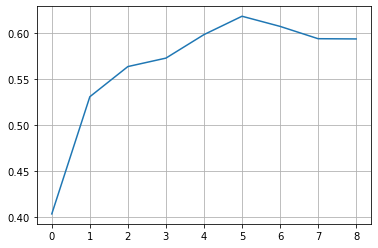

In [59]:
n_neighbors =list(range(1, 10))
accuracy = []
for neighbor in n_neighbors:
    clf = KNeighborsRegressor(n_neighbors = neighbor)
    clf.fit(df_train6, goal_train3)
    score = clf.score(df_test6, goal_test3)
    accuracy.append(score)
plt.grid(True)
plt.plot(accuracy)

In [60]:
knn2 = KNeighborsRegressor(n_neighbors = 5)
knn2.fit(df_train6, goal_train3)
knn2_predict = knn2.predict(df_test6)
knn_mse2 = np.power(goal_test3 - knn2_predict, 2).mean()

In [61]:
knn_rmse2 = knn_mse2 ** .5
knn_rmse2

5254.1800195136675

In [62]:
knn2_scores = cross_val_score(knn2, df_test6, goal_test3, cv=10)
knn2_scores


array([0.46883649, 0.46369285, 0.59270023, 0.56427594, 0.33024053,
       0.53479367, 0.55311628, 0.36523227, 0.56416681, 0.49563041])

In [63]:
knn2_scores.mean()

0.4932685475870634

Interestingly this model performed the worst out of all the models. It had the worst RMSE and its accurac score is around 20% lower than the regression. Therefore the regression model is the model to use when predicting Alumni Salary. 

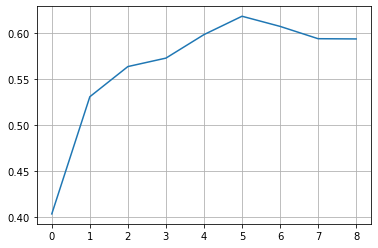

In [64]:
n_neighbors =list(range(1, 10))
accuracy = []
for neighbor in n_neighbors:
    clf = KNeighborsRegressor(n_neighbors = neighbor)
    clf.fit(df_train6, goal_train3)
    score = clf.score(df_test6, goal_test3)
    accuracy.append(score)
plt.grid(True)
plt.plot(accuracy)

As the model is already at its more effective number of neighbors, there is little that can be done to improve on the model. Therefore, the linear regression model is the best predictor of alumni salary.

In [65]:
df.to_excel(r'C:\Users\Woyte\OneDrive\Colleges.xlsx', index = False)
